This data has 800 rows and 12 columns. And I am going to examine this data if pokemons legendary or not. First of all, I added numpy, pandas etc. and then I imported the data. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['tests.csv', 'pokemon.csv', 'combats.csv']


In [3]:
# import data
data =pd.read_csv("../input/pokemon.csv")
# I took sample for examine data
data.sample(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
245,246,Skarmory,Steel,Flying,65,80,140,40,70,70,2,False
350,351,Wailmer,Water,NaN,130,70,35,70,35,60,3,False
741,742,Gogoat,Grass,NaN,123,100,62,97,81,68,6,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
193,194,Mareep,Electric,NaN,55,40,40,65,45,35,2,False
324,325,Skitty,Normal,NaN,50,45,45,35,35,50,3,False
650,651,Escavalier,Bug,Steel,70,135,105,60,105,20,5,False
648,649,Emolga,Electric,Flying,55,75,60,75,60,103,5,False
395,396,Snorunt,Ice,NaN,50,50,50,50,50,50,3,False
507,508,Lumineon,Water,NaN,69,69,76,69,86,91,4,False


Interesting! We have a pokemon named 'NaN' on 62. rows. Is that pokemon's name ? Or is that a problem ?  

In [65]:
data.loc[63:63]

,name,type1,type2,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


I want to see pokemons named 'NaN' on the chart. But I couldnt find any of them. I will wait your comment about this topic. I think the data is wrong but it's not important for now.

In [66]:
nan=data[data['name']=="NaN"]
nan

,name,type1,type2,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary



I saw that '#' column on the chart. But it is not beneficial for us. I can drop of that column from the chart. And then I'll edit columns name.

In [4]:
data=data.drop(['#'],axis=1) # drop column
# editing index number
data.index=range(1,801,1)

In [5]:
data.tail()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [6]:
# editing columns name
data.rename(columns={"Name":"name"},inplace=True)
data.rename(columns={"Type 1":"type1"},inplace=True)
data.rename(columns={"Type 2":"type2"},inplace=True)
data.rename(columns={"HP":"hp"},inplace=True)
data.rename(columns={"Attack":"attack"},inplace=True)
data.rename(columns={"Defense":"defense"},inplace=True)
data.rename(columns={"Sp. Atk":"sp_atk"},inplace=True)
data.rename(columns={"Sp. Def":"sp_def"},inplace=True)
data.rename(columns={"Speed":"speed"},inplace=True)
data.rename(columns={"Generation":"generation"},inplace=True)
data.rename(columns={"Legendary":"legendary"},inplace=True)

In [7]:
data.columns

Index(['name', 'type1', 'type2', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def',
       'speed', 'generation', 'legendary'],
      dtype='object')

I edited columns name. For the next step,I want to sort the pokemons by their type and I will examine the population of types.

In the section below.I worked on type1.

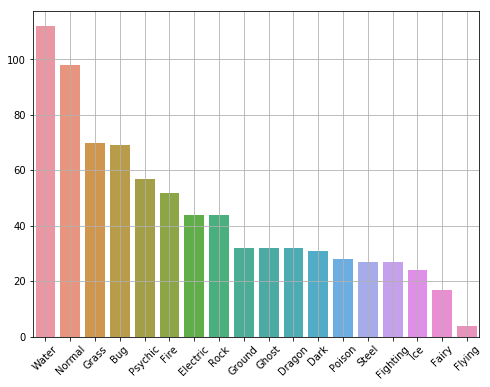

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(x= data.type1.value_counts().index, y= data.type1.value_counts().values)
plt.xticks(rotation=45)
plt.grid()
plt.show()

The most crowded group is Water and the least crowded group is Flying by type1 feature.

Next, I'll examine by type2.

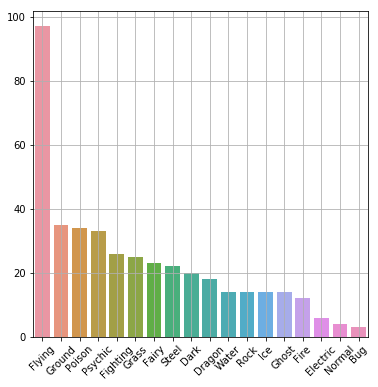

In [67]:
plt.figure(figsize=(6,6))
sns.barplot(x= data.type2.value_counts().index, y= data.type2.value_counts().values)
plt.xticks(rotation=45)
plt.grid()
plt.show()

I think that is interesting. Flying group is the least crowded group by type1 but it is the most crowded group by type2. So, Pokemons are not prefer flying the first feature but they prefer flying as a second feature. Wisely, If I was a pokemon, I would have tought like that too.

For the next step, I'll examine legendary pokemon count of groups by type1. Let's see.


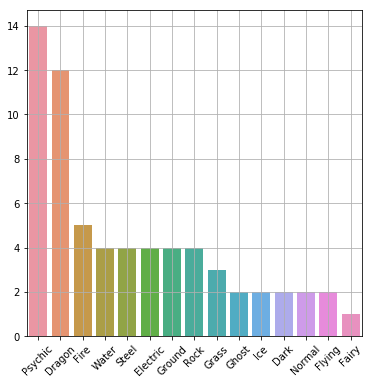

In [11]:
sort_legendary=data[data['legendary']==True] # filtred by legendary
plt.figure(figsize=(6,6))
sns.barplot(x= sort_legendary.type1.value_counts().index, y= sort_legendary.type1.value_counts().values)
plt.xticks(rotation=45)
plt.grid()
plt.show()



The most crowded group is Pycshic group.Second is Dragon group. Next, I'll examine legendary pokemons by type2. 


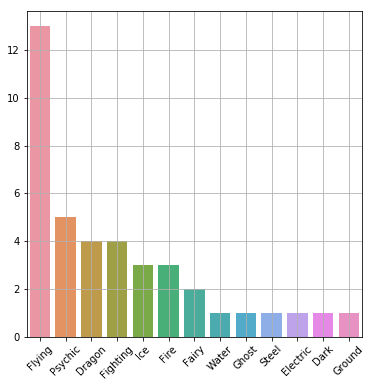

In [68]:
plt.figure(figsize=(6,6))
sns.barplot(x= sort_legendary.type2.value_counts().index, y= sort_legendary.type2.value_counts().values)
plt.xticks(rotation=45)
plt.grid()
plt.show()

The Flying is the most crowded group of type 2  for the legendary pokemons. Next, I'll examine Flying and Pyschic skill in the legendary pokemons.

In [69]:
filtre1 = sort_legendary.type1 =="Psychic"
filtre2=sort_legendary.type2=="Flying"
sort_legendary[filtre1 & filtre2]

,name,type1,type2,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
10,Lugia,Psychic,Flying,106,90,130,90,154,110,2,True


In [25]:
filtre1 = sort_legendary.type1 =="Dragon"
filtre2=sort_legendary.type2=="Fire"
sort_legendary[filtre1 & filtre2]

,name,type1,type2,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
707,Reshiram,Dragon,Fire,100,120,100,150,120,90,5,True


The most used type1 skill is the physic and the most used type2 skill is flying and there is only one legendary pokemon that uses these two attiributes together.Lugia.

Let's see non-legendary pokemons.

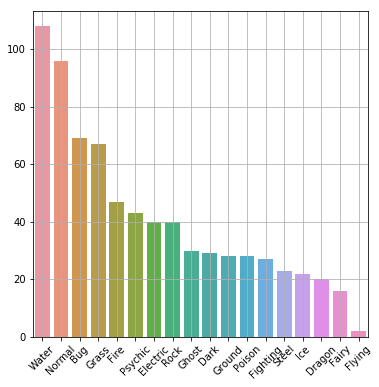

In [70]:
non_legendary=data[data['legendary']==False]
plt.figure(figsize=(6,6))
sns.barplot(x= non_legendary.type1.value_counts().index, y= non_legendary.type1.value_counts().values)
plt.xticks(rotation=45)
plt.grid()
plt.show()

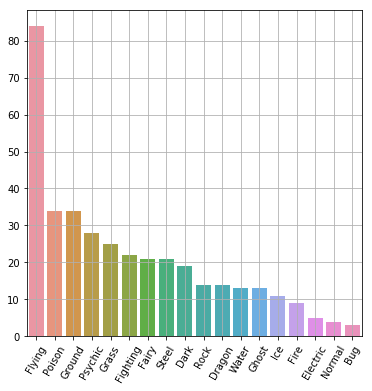

In [71]:
plt.figure(figsize=(6,6))
sns.barplot(x= non_legendary.type2.value_counts().index, y= non_legendary.type2.value_counts().values)
plt.xticks(rotation=60)
plt.grid()
plt.show()

The most crowded group is Water in type1 and the most crowded group is Flying in type2. Next, I'll examine water for type1 and flying for type2 in the non-legendary pokemons.


In [72]:
filtre1 = non_legendary.type1 == "Water"
filtre2 = non_legendary.type2 == "Flying"
non_legendary[filtre1 & filtre2]

,name,type1,type2,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
141,Gyarados,Water,Flying,95,125,79,60,100,81,1,False
245,Mantine,Water,Flying,65,40,70,80,140,70,2,False
302,Wingull,Water,Flying,40,30,30,55,30,85,3,False
303,Pelipper,Water,Flying,60,50,100,85,70,65,3,False
509,Mantyke,Water,Flying,45,20,50,60,120,50,4,False
642,Ducklett,Water,Flying,62,44,50,44,50,55,5,False
643,Swanna,Water,Flying,75,87,63,87,63,98,5,False


In [73]:
filtre1 = non_legendary.type1 == "Dragon"
filtre2 = non_legendary.type2 == "Flying"
non_legendary[filtre1 & filtre2]

,name,type1,type2,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False
366,Altaria,Dragon,Flying,75,70,90,70,105,80,3,False
409,Salamence,Dragon,Flying,95,135,80,110,80,100,3,False
410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False


In [74]:
non_legendary[filtre1]

,name,type1,type2,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
160,Dratini,Dragon,NaN,41,64,45,50,50,50,1,False
161,Dragonair,Dragon,NaN,61,84,65,70,70,70,1,False
162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False
366,Altaria,Dragon,Flying,75,70,90,70,105,80,3,False
367,Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False
407,Bagon,Dragon,NaN,45,75,60,40,30,50,3,False
408,Shelgon,Dragon,NaN,65,95,100,60,50,50,3,False
409,Salamence,Dragon,Flying,95,135,80,110,80,100,3,False
410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False
492,Gible,Dragon,Ground,58,70,45,40,45,42,4,False


Now, I want to see the differences of between legendary and non-legendary pokemons.

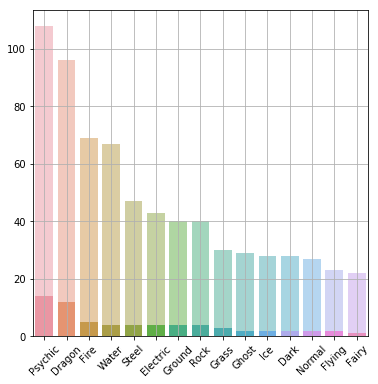

In [75]:
plt.figure(figsize=(6,6))
sns.barplot(x= non_legendary.type1.value_counts().index, y= non_legendary.type1.value_counts().values, alpha=0.5)
sns.barplot(x= sort_legendary.type1.value_counts().index, y= sort_legendary.type1.value_counts().values)
plt.xticks(rotation=45)
plt.grid()
plt.show()

Those have same ratio by type1.

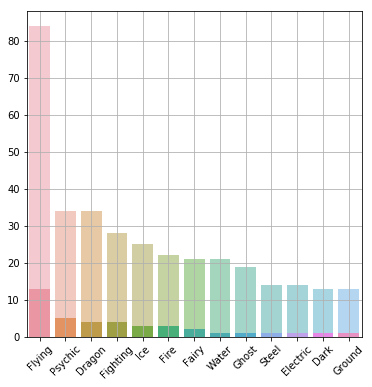

In [38]:
plt.figure(figsize=(6,6))
sns.barplot(x= non_legendary.type2.value_counts().index, y= non_legendary.type2.value_counts().values, alpha=0.5)
sns.barplot(x= sort_legendary.type2.value_counts().index, y= sort_legendary.type2.value_counts().values)
plt.xticks(rotation=45)
plt.grid()
plt.show()

Those have same ratio by type2.

Next I want to see corelation of attack and defense value using by scater plot. 

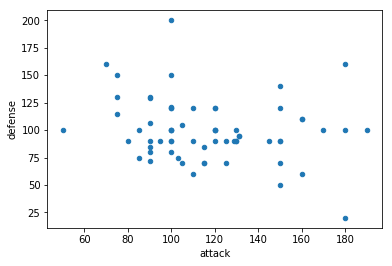

In [39]:
sort_legendary.plot(kind="scatter",x="attack",y="defense")

We can see that, there is no relation between attack and defense. Let's see HP and defense , HP and attack graphic.


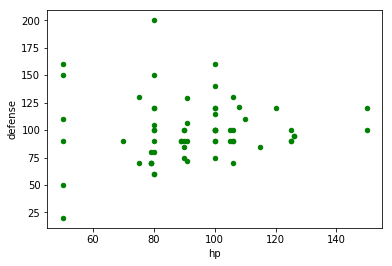

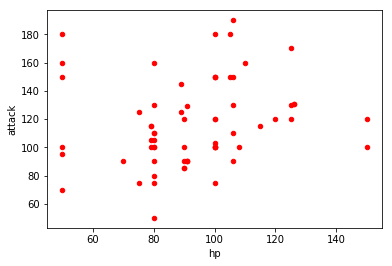

In [40]:
sort_legendary.plot(kind="scatter",x="hp",y="defense",color="green")
sort_legendary.plot(kind="scatter",x="hp",y="attack",color="red")


There is no relation again. Now, I will examine speed and attack, speed and HP, speed and defense.
Bu değerler arasında da yine bir korelasyon görülmemektedir. Şimdi speed ile attack inceleyelim.

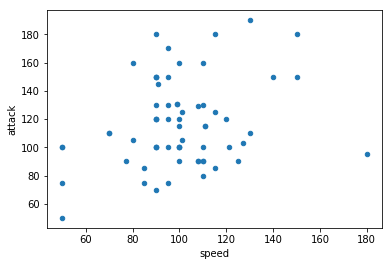

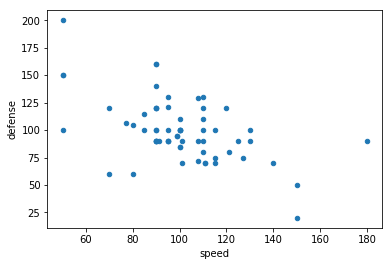

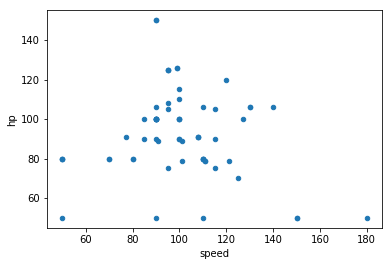

In [41]:
sort_legendary.plot(kind="scatter", x="speed", y="attack")
sort_legendary.plot(kind="scatter", x="speed", y="defense")
sort_legendary.plot(kind="scatter", x="speed", y="hp")

No relation again.

That is enough. I'll see the defense-attack relation of all data.

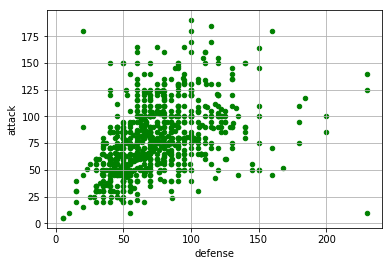

In [46]:
data.plot(kind="scatter", x="defense", y="attack", color="green", grid=True)


There are outlier values in the graphic. But usually there are relation between two values.


I tried to explain something with my weak English. I'm gonna improve that kernel as long as I study data analysis. Best regards...